In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [4]:
from google.colab import files
uploaded = files.upload()

Saving currencies_data.csv to currencies_data.csv


In [5]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['currencies_data.csv']))

In [6]:
df

,cmcRank,name,symbol,marketPairCount,circulatingSupply,totalSupply,maxSupply,isActive,lastUpdated,dateAdded,...,percentChange1h,percentChange24h,percentChange7d,percentChange30d,percentChange60d,percentChange90d,fullyDilluttedMarketCap,marketCapByTotalSupply,dominance,ytdPriceChangePercentage
0,1,Bitcoin,USD,10442,1.947631e+07,1.947631e+07,2.100000e+07,1,2023-09-04T14:57:00.000Z,2010-07-13T00:00:00.000Z,...,-0.151618,-0.286439,-1.011075,-11.014572,-14.243425,-0.602343,5.427690e+11,5.033874e+11,48.3538,55.4648
1,2,Ethereum,USD,7329,1.202177e+08,1.202177e+08,NaN,1,2023-09-04T14:57:00.000Z,2015-08-07T00:00:00.000Z,...,-0.231393,-0.394296,-1.167014,-11.139750,-13.168089,-11.297800,1.958790e+11,1.958790e+11,18.8155,35.6717
2,3,Tether USDt,USD,61319,8.290017e+10,8.543720e+10,NaN,1,2023-09-04T14:57:00.000Z,2015-02-25T00:00:00.000Z,...,-0.018710,-0.020663,0.011400,0.068201,-0.040030,-0.041019,8.540772e+10,8.540772e+10,7.9604,-0.0037
3,4,BNB,USD,1605,1.538500e+08,1.538500e+08,NaN,1,2023-09-04T14:57:00.000Z,2017-07-25T00:00:00.000Z,...,-0.177729,0.479339,-1.317269,-10.890590,-8.878355,-22.728145,3.315388e+10,3.315388e+10,3.1847,-11.7320
4,5,XRP,USD,1061,5.297770e+10,9.998846e+10,1.000000e+11,1,2023-09-04T14:57:00.000Z,2013-08-04T00:00:00.000Z,...,-0.102062,0.156371,-3.182004,-19.955193,7.952432,-1.844853,5.024069e+10,5.023489e+10,2.5567,48.3061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446171,9280,DeFido,USD,2,0.000000e+00,1.000000e+08,1.000000e+08,1,2023-09-04T15:00:00.000Z,2023-08-09T11:56:51.000Z,...,0.000000,0.000000,-1.250495,-81.643051,-81.643051,-81.643051,1.753517e+04,1.753517e+04,0.0000,0.0000
446172,9281,GunBet,USD,2,0.000000e+00,1.000000e+07,1.000000e+07,1,2023-09-04T15:00:00.000Z,2023-08-10T07:15:33.000Z,...,0.000000,0.000000,-8.083381,-98.944749,-98.944749,-98.944749,1.631004e+04,1.631004e+04,0.0000,0.0000
446173,9282,MosesCoin,USD,1,0.000000e+00,1.000000e+12,1.000000e+12,1,2023-09-04T15:00:00.000Z,2023-08-18T13:02:53.000Z,...,0.000000,-0.161447,-48.158507,-73.641855,-73.641855,-73.641855,9.142545e+04,9.142545e+04,0.0000,0.0000
446174,9283,Shibarium Token,USD,1,0.000000e+00,1.000000e+09,1.000000e+09,1,2023-09-04T15:00:00.000Z,2023-08-21T14:14:42.000Z,...,0.000000,0.000000,-0.440193,-6.455954,-6.455954,-6.455954,7.758348e+05,7.758348e+05,0.0000,0.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446176 entries, 0 to 446175
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cmcRank                   446176 non-null  int64  
 1   name                      446176 non-null  object 
 2   symbol                    446176 non-null  object 
 3   marketPairCount           446176 non-null  int64  
 4   circulatingSupply         446176 non-null  float64
 5   totalSupply               446176 non-null  float64
 6   maxSupply                 347894 non-null  float64
 7   isActive                  446176 non-null  int64  
 8   lastUpdated               446176 non-null  object 
 9   dateAdded                 446176 non-null  object 
 10  name.1                    446176 non-null  object 
 11  price                     446176 non-null  float64
 12  volume24h                 446176 non-null  float64
 13  marketCap                 446176 non-null  f

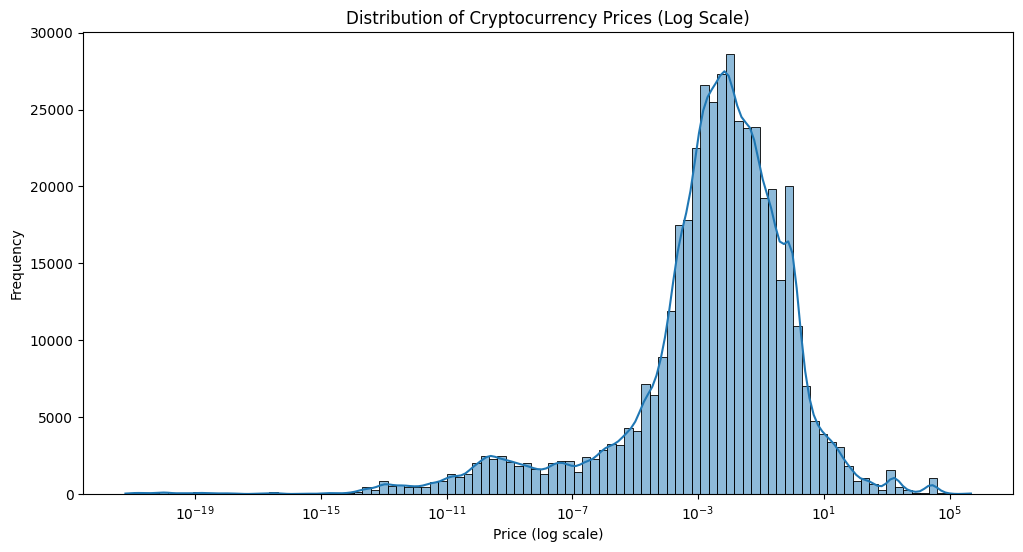

,price,marketCap,volume24h,percentChange1h,percentChange24h,percentChange7d
count,4.461760e+05,4.461760e+05,4.461760e+05,446176.000000,4.461760e+05,4.461760e+05
mean,1.731627e+02,3.080771e+07,1.658354e+06,0.167153,5.271015e+02,4.107521e+07
std,6.304269e+03,9.786379e+08,5.007853e+07,24.295417,3.848914e+04,4.510294e+09
min,6.140000e-22,0.000000e+00,0.000000e+00,-95.583328,-9.815875e+01,-9.984594e+01
25%,3.464436e-04,0.000000e+00,5.264874e+02,-0.265131,-1.734968e+00,-7.770524e+00
50%,6.296230e-03,0.000000e+00,1.983847e+04,-0.136868,-1.045641e-01,-1.682052e+00
75%,1.007509e-01,9.355758e+05,1.611429e+05,0.000000,1.089004e+00,1.371963e+00
max,4.756083e+05,5.033874e+11,1.701102e+10,2002.191449,2.874015e+06,4.963326e+11


In [8]:
# Convert date columns to datetime
df["lastUpdated"] = pd.to_datetime(df["lastUpdated"])
df["dateAdded"] = pd.to_datetime(df["dateAdded"])

# Summary statistics for key numerical features
summary_stats = df[["price", "marketCap", "volume24h", "percentChange1h", "percentChange24h", "percentChange7d"]].describe()

# Plot distribution of price to check for outliers
plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=100, kde=True, log_scale=True)
plt.title("Distribution of Cryptocurrency Prices (Log Scale)")
plt.xlabel("Price (log scale)")
plt.ylabel("Frequency")
plt.show()

summary_stats

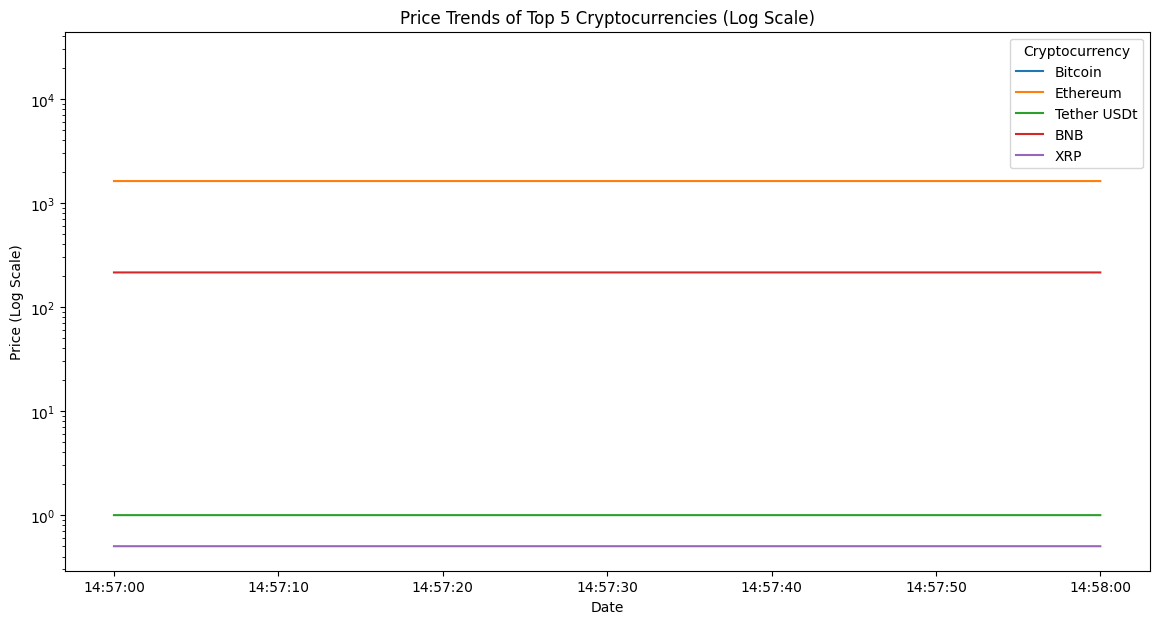

In [10]:
# Select top 5 cryptocurrencies by market cap
top_5_cryptos = df.groupby("name")["marketCap"].max().nlargest(5).index
df_top_5 = df[df["name"].isin(top_5_cryptos)]

# Plot price trends over time for top cryptocurrencies
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_5, x="lastUpdated", y="price", hue="name")
plt.yscale("log")
plt.title("Price Trends of Top 5 Cryptocurrencies (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Price (Log Scale)")
plt.legend(title="Cryptocurrency")
plt.show()

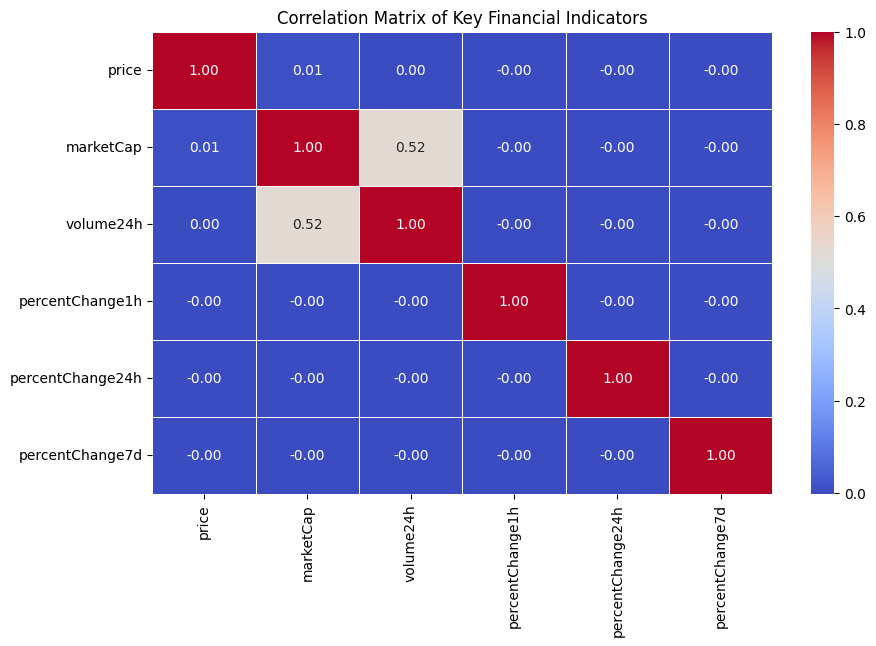

In [11]:
# Compute correlation matrix for numerical features
correlation_matrix = df[["price", "marketCap", "volume24h", "percentChange1h", "percentChange24h", "percentChange7d"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Financial Indicators")
plt.show()


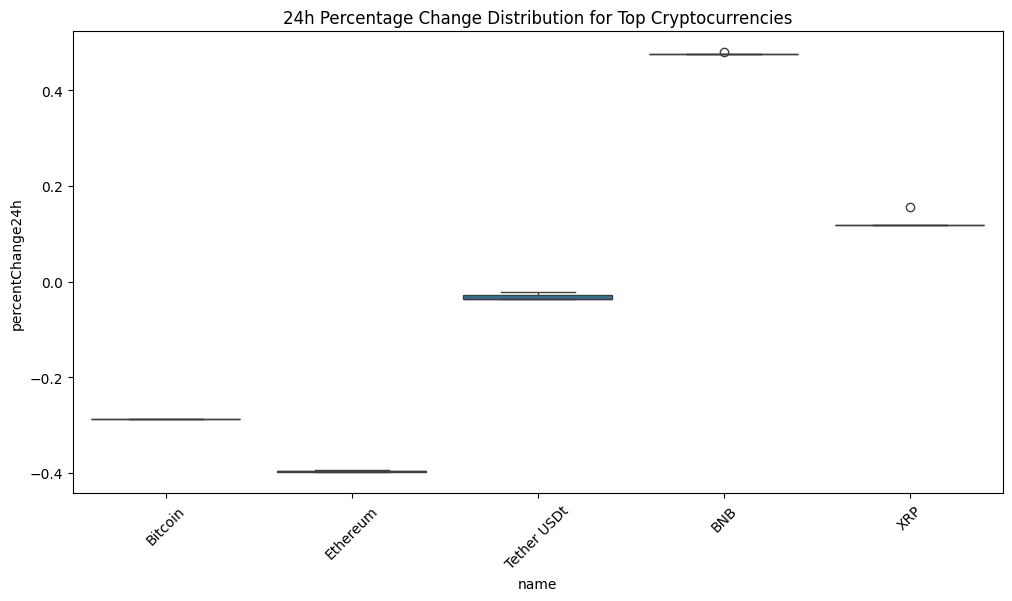

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["name"].isin(top_5_cryptos)], x="name", y="percentChange24h")
plt.xticks(rotation=45)
plt.title("24h Percentage Change Distribution for Top Cryptocurrencies")
plt.show()


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = ["price", "marketCap", "volume24h", "percentChange1h", "percentChange24h", "percentChange7d"]
df[scaled_features] = scaler.fit_transform(df[scaled_features])

df.head()  # Check transformed data


,cmcRank,name,symbol,marketPairCount,circulatingSupply,totalSupply,maxSupply,isActive,lastUpdated,dateAdded,...,percentChange1h,percentChange24h,percentChange7d,percentChange30d,percentChange60d,percentChange90d,fullyDilluttedMarketCap,marketCapByTotalSupply,dominance,ytdPriceChangePercentage
0,1,Bitcoin,USD,10442,1.947631e+07,1.947631e+07,2.100000e+07,1,2023-09-04 14:57:00+00:00,2010-07-13 00:00:00+00:00,...,0.045492,0.000034,1.991303e-10,-11.014572,-14.243425,-0.602343,5.427690e+11,5.033874e+11,48.3538,55.4648
1,2,Ethereum,USD,7329,1.202177e+08,1.202177e+08,NaN,1,2023-09-04 14:57:00+00:00,2015-08-07 00:00:00+00:00,...,0.045454,0.000034,1.988161e-10,-11.139750,-13.168089,-11.297800,1.958790e+11,1.958790e+11,18.8155,35.6717
2,3,Tether USDt,USD,61319,8.290017e+10,8.543720e+10,NaN,1,2023-09-04 14:57:00+00:00,2015-02-25 00:00:00+00:00,...,0.045555,0.000034,2.011904e-10,0.068201,-0.040030,-0.041019,8.540772e+10,8.540772e+10,7.9604,-0.0037
3,4,BNB,USD,1605,1.538500e+08,1.538500e+08,NaN,1,2023-09-04 14:57:00+00:00,2017-07-25 00:00:00+00:00,...,0.045479,0.000034,1.985134e-10,-10.890590,-8.878355,-22.728145,3.315388e+10,3.315388e+10,3.1847,-11.7320
4,5,XRP,USD,1061,5.297770e+10,9.998846e+10,1.000000e+11,1,2023-09-04 14:57:00+00:00,2013-08-04 00:00:00+00:00,...,0.045515,0.000034,1.947564e-10,-19.955193,7.952432,-1.844853,5.024069e+10,5.023489e+10,2.5567,48.3061


In [15]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[["marketCap", "volume24h", "percentChange1h", "percentChange24h", "percentChange7d"]].values
y = df["price"].values

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # Output layer for price prediction
])

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 1.8238e-04 - mae: 0.0011 - val_loss: 1.5974e-04 - val_mae: 0.0015
Epoch 2/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 1.8505e-04 - mae: 9.2715e-04 - val_loss: 1.5922e-04 - val_mae: 0.0010
Epoch 3/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 1.9584e-04 - mae: 9.3491e-04 - val_loss: 1.5917e-04 - val_mae: 9.4934e-04
Epoch 4/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 1.9758e-04 - mae: 9.3763e-04 - val_loss: 1.5954e-04 - val_mae: 0.0013
Epoch 5/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 1.4780e-04 - mae: 8.2615e-04 - val_loss: 1.5928e-04 - val_mae: 4.1525e-04
Epoch 6/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 2.1337e-04 - mae: 9.8619e-04 - val_loss: 1.5912e-04 - val_mae: 7.6276e-04
Epoch 7/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 1.5047e-04 - mae: 8.5148e-04 - val_loss: 1.5930e-04 - val_mae: 4.4434e-04
Epoch 8/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━

In [17]:
# Reshape input data for CNN (adding 1D convolutional dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [18]:
model_cnn = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=2, activation="relu", input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # Output layer for price prediction
])

# Compile the CNN model
model_cnn.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=16, validation_data=(X_test_cnn, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22309/22309 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 1.8293e-04 - mae: 9.3505e-04 - val_loss: 1.5919e-04 - val_mae: 4.2416e-04
Epoch 2/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 1.4633e-04 - mae: 8.2402e-04 - val_loss: 1.9078e-04 - val_mae: 0.0063
Epoch 3/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 1.7969e-04 - mae: 9.0663e-04 - val_loss: 1.8984e-04 - val_mae: 0.0062
Epoch 4/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 1.9847e-04 - mae: 9.7482e-04 - val_loss: 1.5931e-04 - val_mae: 4.4680e-04
Epoch 5/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 1.8865e-04 - mae: 9.4786e-04 - val_loss: 1.5956e-04 - val_mae: 6.6762e-04
Epoch 6/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 1.9764e-04 - mae: 9.5478e-04 - val_loss: 1.5912e-04 - val_mae: 7.6215e-04
Epoch 7/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 1.6635e-04 - mae: 8.7358e-04 - val_loss: 1.5912e-04 - val_mae: 8.0328e-04
Epoch 8/50
22309/22309 ━━━━━━━━━━━━━━━━━━━━ 63

In [19]:
# Get final validation loss for both models
ann_val_loss = history.history["val_loss"][-1]
cnn_val_loss = history_cnn.history["val_loss"][-1]

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    "Model": ["ANN", "CNN"],
    "Validation Loss": [ann_val_loss, cnn_val_loss]
})

print(comparison_df)


  Model  Validation Loss
0   ANN         0.000159
1   CNN         0.000159


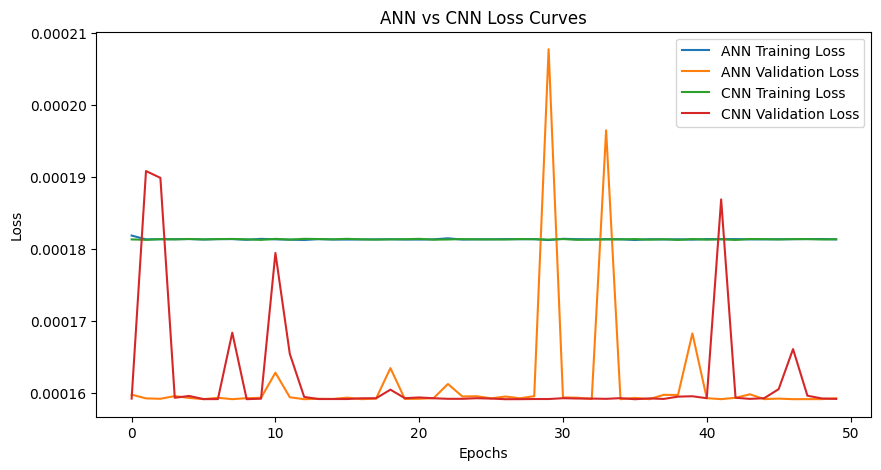

In [20]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label="ANN Training Loss")
plt.plot(history.history["val_loss"], label="ANN Validation Loss")
plt.plot(history_cnn.history["loss"], label="CNN Training Loss")
plt.plot(history_cnn.history["val_loss"], label="CNN Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ANN vs CNN Loss Curves")
plt.legend()
plt.show()

2789/2789 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2789/2789 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


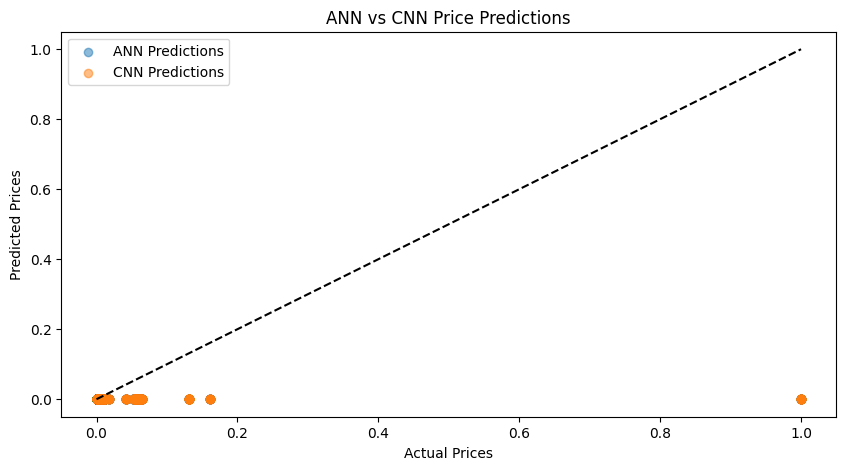

In [21]:
y_pred_ann = model.predict(X_test)
y_pred_cnn = model_cnn.predict(X_test_cnn)

# Plot predictions vs actual prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_ann, label="ANN Predictions", alpha=0.5)
plt.scatter(y_test, y_pred_cnn, label="CNN Predictions", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="black")  # Perfect predictions line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("ANN vs CNN Price Predictions")
plt.show()

